# DL Study fourth week  
- over-fitting problem

### Over-Fitting (과적합)이란?  
- train data에 대해서만 성능이 좋으며 그 외의 data에 대해서는 성능이 좋지 않은 경우를 오버피팅이라 함  

<img src = "http://itimg.chosun.com/sitedata/image/201802/06/2018020685029_1.jpg">  

- 우리의 목표는 train data를 잘 맞추는 것이 아님  
- train data를 하나 하나 다 맞추는 것이 아닌 경향성만 파악을 하는 것이 목적  
- 그래서 어떤 data에 대해서도 좋은 성능을 가질 수 있는 일반화된 모델을 얻는 것이다  
- 그러나 우리가 어떤 목적을 두고 딥러닝 모델을 구축할 때 항상 좋은 성능의 모델을 얻을 수 만은 없다  
- 다양하게 겪을 수 있는 문제 중에서 오버피팅을 해결하는 방법을 살펴본다  

- 1. early stopping  
    - validation의 loss가 증가하기 시작하는 지점 전까지 model을 저장해 학습을 종료시키는 기법이다  
    
- 2. regularization  
    - 오버피팅이 일어나는 이유를 최적화 관점에서 생각해보면 loss 값이 필요 이상으로 작아진다고 볼 수 있다  
    - 즉, loss function에 어떤 값을 추가해 loss 값이 너무 작아지지 않게 설정하는 것이다  
    - 이를 regularizatoin(정규화)라고 한다  
    - 일반적으로 L1 regularization, L2 regularization을 사용한다  
    - weight에도 마찬가지로 적용 가능  
    
    $$Loss = Error\left(y, \hat{y} \right) + \lambda \sum_{i=1}^N|w_i|$$

- 3. batch normalization  
    - batch normalization은 activation layer의 output을 정규화하는 작업을 뜻한다  
    - 활성화 값이 어느 한 쪽으로 치우친 형태가 아닌 적절하게 분포되도록 하도록 도와준다  
    - batch normalization을 함으로써 초깃값에 크게 의존하지 않아도 되며  
    - gradient vanishing을 방지할 수 있다  
    - Convolution layer 이후에, activation layer 이전에 적용한다

- 4. drop out  
    - drop out은 network의 일부 노드만 동작하고 일부는 동작하지 않도록 설정하는 방법이다  
    - 훈련 과정에서 일부 뉴런을 임의로 삭제하면서 학습을 한다  
    - activation layer 이후에 적용한다  

- 5. network를 더 간단하게 구성  
    - network가 너무 깊거나 복잡해 gradient vanishing이 일어나는 경우에 layer 수를 더 줄이면 해결할 수 있다  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import (
    Sequential
)
from tensorflow.keras.layers import (
    Conv2D, 
    MaxPooling2D,
    BatchNormalization, 
    Dropout,
    Flatten, 
    Dense,
    GlobalAveragePooling2D,
    Activation
)

In [2]:
# mnist dataset 로드
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
# dataset의 차원 확인하기
print('The dimension of train data :', X_train.shape, y_train.shape)
print('The dimension of test data :', X_test.shape, y_test.shape)

The dimension of train data : (60000, 28, 28) (60000,)
The dimension of test data : (10000, 28, 28) (10000,)


In [4]:
# label data를 one-hot encoding으로 변환 
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [5]:
# normalization
X_train = X_train/255.0
X_test = X_test/255.0

### validation data 생성

In [6]:
# train data set의 20%를 validation data로 split
from sklearn.model_selection import train_test_split

X_train, X_valid = train_test_split(X_train, test_size=0.2, shuffle=True, random_state=42)
y_train, y_valid = train_test_split(y_train, test_size=0.2, shuffle=True, random_state=42)

In [7]:
# train data와 validation data의 shape 확인
print(X_train.shape, X_valid.shape)
print(y_train.shape, y_valid.shape)

(48000, 28, 28) (12000, 28, 28)
(48000, 10) (12000, 10)


In [8]:
# 모델 구축하기 전에 이미지 shape 변경
X_train = X_train.reshape(-1, 28, 28, 1)
X_valid = X_valid.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [9]:
# CNN model 구축
# batch normalization layer, drop out layer 사용
model = Sequential([
    Conv2D(20, kernel_size=(3,3), strides=1, padding='same', 
           input_shape=(28,28,1)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),
    Conv2D(20, kernel_size=(3,3), strides=1, padding='same', 
           kernel_regularizer=tf.keras.regularizers.l1(l=0.01)), # L1 regularization
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),
    MaxPooling2D(pool_size=(2,2)),
    
    Conv2D(40, kernel_size=(3,3), strides=1, padding='same', 
           kernel_regularizer=tf.keras.regularizers.l1(l=0.01)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),
    Conv2D(40, kernel_size=(3,3), strides=1, padding='same', 
           kernel_regularizer=tf.keras.regularizers.l1(l=0.01)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),
    MaxPooling2D(pool_size=(2,2)),
    
    GlobalAveragePooling2D(),
    Dense(20),
    Dropout(0.5),
    Activation('relu'),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 20)        200       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 20)        80        
_________________________________________________________________
activation (Activation)      (None, 28, 28, 20)        0         
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 20)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 20)        3620      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 20)        80        
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 20)        0

## Global Average Pooling이란?  
- 일반적으로 CNN에서 Convolution과 Pooling layer를 충분히 거친 후 flatten을 시켜 fully connected layer로 구성한다  
- 그러나 flatten과 fc layer의 문제점은 feature에 대한 위치 정보를 손실한다는 것이다  
- 심지어 차원도 높다  
- 그래서 차원을 줄여주면서 feature의 위치 정보를 기억해주는 layer가 필요하다  
- global average pooling layer는 이런 역할을 하기에 충분하다  

<img src = "https://gaussian37.github.io/assets/img/dl/concept/gap/5.png">

In [11]:
# 학습하기 전 모델 compile하기
# early stopping 설정
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                      patience=10,
                                      mode='min',
                                      verbose=1)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
history = model.fit(X_train, y_train,
                    validation_data=(X_valid, y_valid),
                    epochs=30,
                    batch_size=32,
                    callbacks=[es])

Epoch 1/30
1500/1500 [==============================] - 54s 35ms/step - loss: 2.7623 - accuracy: 0.3823 - val_loss: 2.5099 - val_accuracy: 0.2297
Epoch 2/30
1500/1500 [==============================] - 55s 37ms/step - loss: 1.8713 - accuracy: 0.5597 - val_loss: 2.6397 - val_accuracy: 0.2216
Epoch 3/30
1500/1500 [==============================] - 57s 38ms/step - loss: 1.7404 - accuracy: 0.5989 - val_loss: 2.6731 - val_accuracy: 0.1758
Epoch 4/30
1500/1500 [==============================] - 57s 38ms/step - loss: 1.6543 - accuracy: 0.6200 - val_loss: 2.0122 - val_accuracy: 0.4156
Epoch 5/30
1500/1500 [==============================] - 56s 38ms/step - loss: 1.6343 - accuracy: 0.6283 - val_loss: 1.8438 - val_accuracy: 0.6275
Epoch 6/30
1500/1500 [==============================] - 57s 38ms/step - loss: 1.6210 - accuracy: 0.6321 - val_loss: 2.6271 - val_accuracy: 0.1134
Epoch 7/30
1500/1500 [==============================] - 56s 38ms/step - loss: 1.6040 - accuracy: 0.6367 - val_loss: 1.9022 -

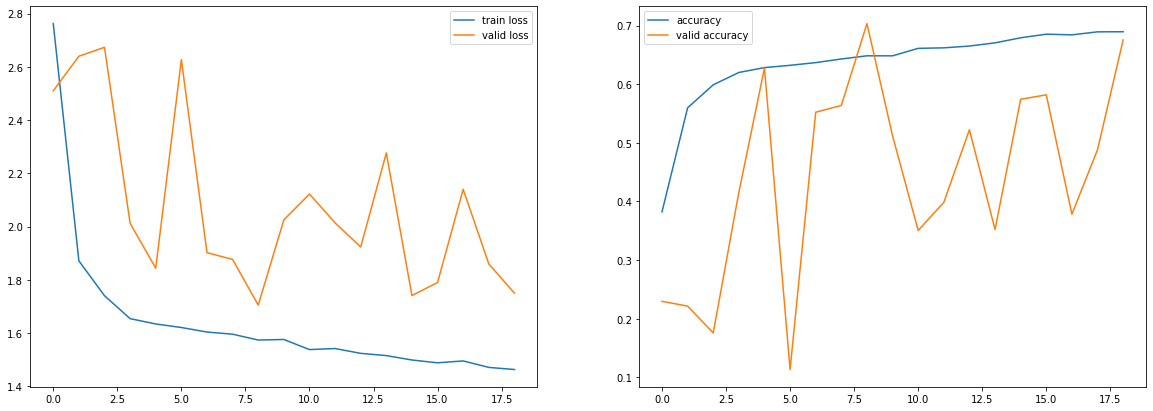

In [14]:
# loss 및 accuracy 그래프 살펴보기
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='valid loss')
plt.legend(loc='best')
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='valid accuracy')
plt.legend(loc='best')
plt.show()

In [15]:
# 모델 평가
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Error: {test_loss}, Accuracy: {test_acc*100:.2f}%')

313/313 - 2s - loss: 1.7298 - accuracy: 0.6875
Error: 1.729753851890564, Accuracy: 68.75%
